# What is the average birth weight of babies in the United States?

### Using data from National Survey of Family Growth (NSFG) from the National Center for Health Statistics
https://www.cdc.gov/nchs/nsfg/nsfg_2017_2019_puf.htm  
![nsfg_homepage](images/NSFG_homepage.jpg)


Data downloaded from AllenDowney/ThinkStats2 Github:  
https://github.com/AllenDowney/ThinkStats2/tree/master/homeworks

The Codebook with column explanations was downloaded here:  
https://www.cdc.gov/nchs/data/nsfg/2013-2015_NSFG_FemPregFile_Codebook.pdf

## Import the data and put into a dataframe

In [33]:
# Import dependencies
import pandas as pd
import numpy as np


In [ ]:
# Read the data into a pandas dataframe
nsfg = pd.read_hdf('data/nsfg.hdf5', 'nsfg')

In [4]:
type(nsfg)

pandas.core.frame.DataFrame

### First thing to do is read the documentation to understand the meaning of the data you are working with

#### Using the Codebook (download link above) we examine one of the variables
![birthwgt_oz1](images/birthwgt_oz1.jpg)  


### Next, take a first look at what we are dealing with using:
```pandas
nsfg.shape
nsfg.columns
nsfg.head()
```

In [6]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [7]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
# Display the first 5 (default) rows of the dataframe with column names
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


# <span style="color:blue">Check and validate to prepare for data analysis</span>

### Validate data by using <span style="color:blue">.value_counts()</span>  method

In [15]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Select column birthwgt_lb1: pounds
pounds = nsfg['birthwgt_lb1']

In [17]:
# Validate pounds data using .value_counts() and .sort_index() to order index
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

The distribution looks normal except for the values of 98 and 99 (which probably indicate missing data)

### Quickly visualize the results using <span style="color:blue">.plot()</span> method of pandas

<AxesSubplot:>

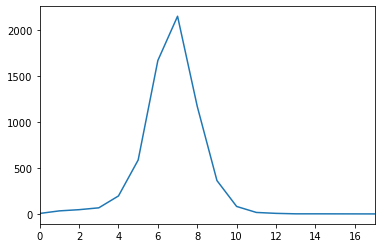

In [30]:
# Quickly visualize the distribution with a cutoff on the x axis
pounds.value_counts().sort_index().plot(xlim=[0,17])

## Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![birthwgt_lb1](images/birthwgt_lb1.jpg)  


The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

## Look at the summary statistics of a column using <span style="color:blue">.describe()</span> method
In this case the birthwgt_lb1 column or 'pounds' series

In [31]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

These results are including the 'missing data' values of 98 and 99
In order to get a meaningful statistical summary we need to replace those values with 'NaN'

## Replace 'missing' data with NaN

In [34]:
# Replace the 'missing data' values of 98 and 99 with 'NaN'
pounds = pounds.replace([98,99], np.nan)

In [36]:
# Now look at the summary statistics and see how the mean has changed!
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

The mean has shifted from 8.06 lbs to 6.7 lbs by removing ninety-four 99lb babies!

In [37]:
# Do the same for ounces using the inplace=True argument of the replace() method
ounces.replace([98,99], np.nan, inplace=True)

In [38]:
### Combine the lbs and ozs series to get total birth weight
birth_weight = pounds + ounces / 16.0

In [39]:
# Review summary stats
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64